In [8]:
# load the iris dataset
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
 


In [2]:
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target
 


In [3]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
 


In [4]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 


GaussianNB()

In [5]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 


In [6]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


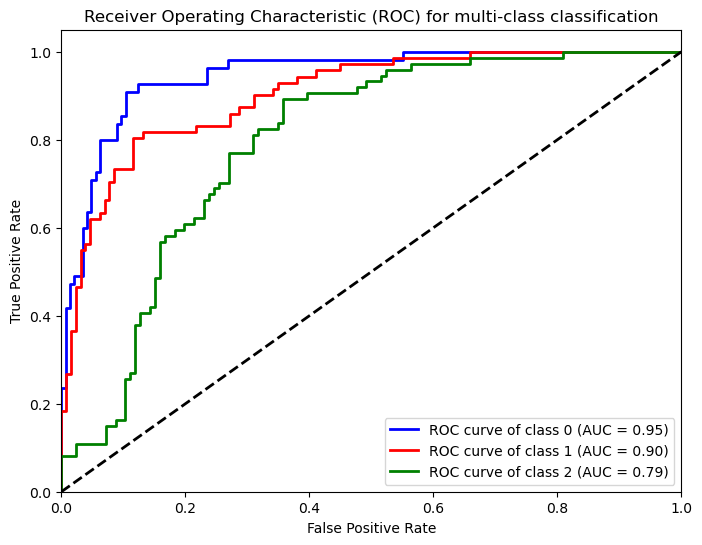

In [9]:
# Load some sample data with 3 classes
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=3, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier for each class using the "one-vs-all" approach
nb_classifiers = []
for i in range(3):
    y_train_i = np.where(y_train == i, 1, 0)
    nb = GaussianNB()
    nb.fit(X_train, y_train_i)
    nb_classifiers.append(nb)

# Compute the ROC curve and AUC for each classifier
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    y_test_i = np.where(y_test == i, 1, 0)
    y_score = nb_classifiers[i].predict_proba(X_test)[:, 1]
    fpr[i], tpr[i], _ = roc_curve(y_test_i, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set the limits of the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the labels of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class classification')
plt.legend(loc="lower right")

# Show the plot
plt.show()
